Лабораторна робота номер 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn import tree
import pydot

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

data = pd.read_csv('SleepStudyData.csv')
data['Enough'] = data['Enough'].map({'Yes': 1, 'No': 0})
data['PhoneReach'] = data['PhoneReach'].map({'Yes': 1, 'No': 0})
data['PhoneTime'] = data['PhoneTime'].map({'Yes': 1, 'No': 0})
data['Breakfast'] = data['Breakfast'].map({'Yes': 1, 'No': 0})
print(data)

     Enough  Hours  PhoneReach  PhoneTime  Tired  Breakfast
0         1      8           1          1      3          1
1         0      6           1          1      3          0
2         1      6           1          1      2          1
3         0      7           1          1      4          0
4         0      7           1          1      2          1
..      ...    ...         ...        ...    ...        ...
891       0      5           1          1      2          0
892       0      7           1          1      3          1
893       0      5           0          1      2          1
894       0      6           1          1      3          0
895       0      9           0          1      5          0

[896 rows x 6 columns]


              Enough     Hours  PhoneReach  PhoneTime     Tired  Breakfast
Enough      1.000000  0.432487   -0.068883  -0.037906 -0.434848   0.193431
Hours       0.432487  1.000000   -0.127606   0.166124 -0.280120   0.315631
PhoneReach -0.068883 -0.127606    1.000000   0.162187 -0.110005  -0.241574
PhoneTime  -0.037906  0.166124    0.162187   1.000000 -0.070507   0.020303
Tired      -0.434848 -0.280120   -0.110005  -0.070507  1.000000  -0.264018
Breakfast   0.193431  0.315631   -0.241574   0.020303 -0.264018   1.000000


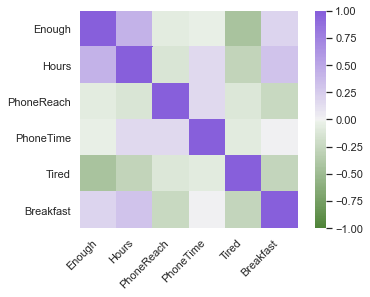

In [36]:
corr = data.corr()
print(corr)
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(120, 275, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

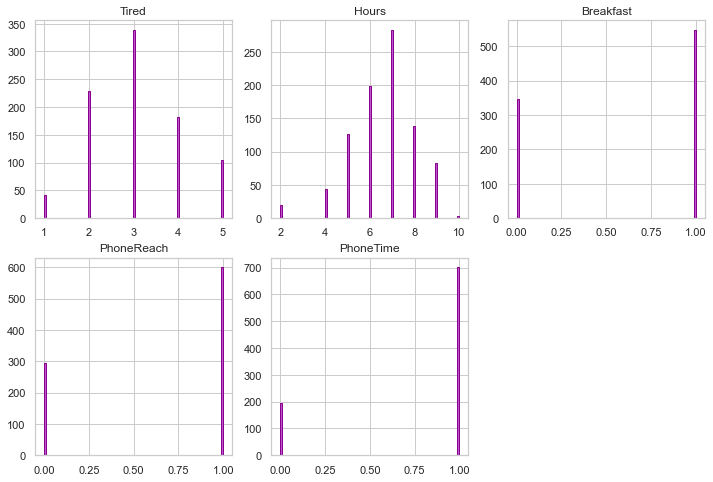

In [14]:
fig, axs = plt.subplots(2, 3, figsize=(12,8))
n_bins = int(len(data) / 10)
axs[0][0].hist(data['Tired'], bins=n_bins, color = "mediumorchid", ec="darkmagenta")
axs[0][0].set_title('Tired')
axs[0][1].hist(data['Hours'], bins=n_bins, color = "mediumorchid", ec="darkmagenta")
axs[0][1].set_title('Hours')
axs[0][2].hist(data['Breakfast'], bins=n_bins, color = "mediumorchid", ec="darkmagenta")
axs[0][2].set_title('Breakfast')
axs[1][0].hist(data['PhoneReach'], bins=n_bins, color = "mediumorchid", ec="darkmagenta")
axs[1][0].set_title('PhoneReach')
axs[1][1].hist(data['PhoneTime'], bins=n_bins, color = "mediumorchid", ec="darkmagenta")
axs[1][1].set_title('PhoneTime')
axs[1][2].remove()

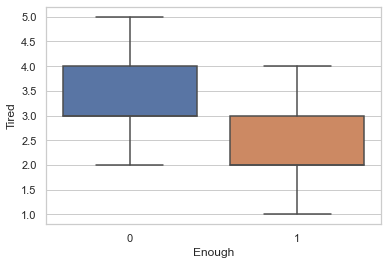

In [17]:
sns.set_theme(style="whitegrid")
ax_1 = sns.boxplot(x="Enough", y="Tired", data=data)

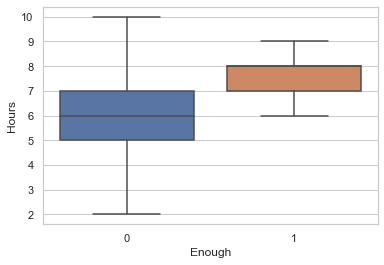

In [18]:
ax_2 = sns.boxplot(x="Enough", y="Hours", data=data)

Ділимо вибірку на трейн та тест

In [6]:
allX = data.iloc[0:None, 1:6]
allY = data.iloc[0:None, 0]
    
Xtrain, Xtest, Ytrain, Ytest = train_test_split(allX, allY, test_size=0.2)

scaler = preprocessing.MinMaxScaler()
Xtrain = pd.DataFrame(scaler.fit_transform(Xtrain.values))
Xtest = pd.DataFrame(scaler.transform(Xtest.values))

In [7]:
def class_report(Params, Ypred, suffix=''):
    print()
    print('Найкращі параметри', suffix)
    print(Params)
    print()
    print('Найкраща точність', suffix)
    print(f1_score(Ytest, Ypred))
    print()
    print(classification_report(Ytest, Ypred, target_names=['Недостатньо сну', 'Достатньо сну']))
    print('Матриця помилок:')
    print(confusion_matrix(Ytest, Ypred, labels=[0, 1]))
    print()

def fit_and_print(clf, parameters, suffix=''):
    grid_clf = GridSearchCV(clf, parameters)
    grid_clf.fit(Xtrain, Ytrain)
    Params = grid_clf.best_params_
    Ypred = grid_clf.predict(Xtest)
    class_report(Params, Ypred, suffix)

KNN

In [8]:
parameters = {'weights':['uniform', 'distance'], 'n_neighbors':range(1, 20)}
clf = KNeighborsClassifier()
fit_and_print(clf, parameters, suffix='для KNN')


Найкращі параметри для KNN
{'n_neighbors': 2, 'weights': 'distance'}

Найкраща точність для KNN
0.7592592592592592

                 precision    recall  f1-score   support

Недостатньо сну       0.86      0.94      0.90       120
  Достатньо сну       0.85      0.68      0.76        60

       accuracy                           0.86       180
      macro avg       0.86      0.81      0.83       180
   weighted avg       0.86      0.86      0.85       180

Матриця помилок:
[[113   7]
 [ 19  41]]



Decision Tree

In [9]:
parameters = {'max_depth':range(1, 10)}
clf = tree.DecisionTreeClassifier()
fit_and_print(clf, parameters, suffix='для Decision Tree')

# clf = tree.DecisionTreeClassifier(max_depth=8)
# clf = clf.fit(Xtrain, Ytrain)
# (graph_clf,) = pydot.graph_from_dot_data(tree.export_graphviz(clf))
# print()
# print(graph_clf)


Найкращі параметри для Decision Tree
{'max_depth': 8}

Найкраща точність для Decision Tree
0.8598130841121495

                 precision    recall  f1-score   support

Недостатньо сну       0.89      0.99      0.94       120
  Достатньо сну       0.98      0.77      0.86        60

       accuracy                           0.92       180
      macro avg       0.94      0.88      0.90       180
   weighted avg       0.92      0.92      0.91       180

Матриця помилок:
[[119   1]
 [ 14  46]]



SVM

In [10]:
parameters_1 = {'kernel':['rbf'], 'C':range(1, 20), 'gamma':[1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]}
parameters_2 = {'kernel':['linear'], 'C':[2, 1.5, 1, 0.75, 0.5, 0.3, 0.2, 0.15, 0.1, 0.05],
                                     'decision_function_shape':['ovo', 'ovr']}
clf = SVC()
fit_and_print(clf, parameters_1, suffix='для SVM з ядром rbf')
fit_and_print(clf, parameters_2, suffix='для SVM з лінійним ядром')


Найкращі параметри для SVM з ядром rbf
{'C': 10, 'gamma': 1.0, 'kernel': 'rbf'}

Найкраща точність для SVM з ядром rbf
0.7647058823529412

                 precision    recall  f1-score   support

Недостатньо сну       0.85      0.97      0.91       120
  Достатньо сну       0.93      0.65      0.76        60

       accuracy                           0.87       180
      macro avg       0.89      0.81      0.84       180
   weighted avg       0.87      0.87      0.86       180

Матриця помилок:
[[117   3]
 [ 21  39]]


Найкращі параметри для SVM з лінійним ядром
{'C': 0.3, 'decision_function_shape': 'ovo', 'kernel': 'linear'}

Найкраща точність для SVM з лінійним ядром
0.6813186813186815

                 precision    recall  f1-score   support

Недостатньо сну       0.81      1.00      0.89       120
  Достатньо сну       1.00      0.52      0.68        60

       accuracy                           0.84       180
      macro avg       0.90      0.76      0.79       180
   weighted a

Random Forest

In [11]:
parameters = {'n_estimators':range(1, 50, 5),
              'criterion':['gini', 'entropy'],
              'max_depth':range(5, 11, 2),
              'min_samples_split':[2, 3, 4, 5]}
clf = RandomForestClassifier()
fit_and_print(clf, parameters, suffix='для Random Forest')


Найкращі параметри для Random Forest
{'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 5, 'n_estimators': 6}

Найкраща точність для Random Forest
0.8648648648648648

                 precision    recall  f1-score   support

Недостатньо сну       0.91      0.97      0.94       120
  Достатньо сну       0.94      0.80      0.86        60

       accuracy                           0.92       180
      macro avg       0.92      0.89      0.90       180
   weighted avg       0.92      0.92      0.91       180

Матриця помилок:
[[117   3]
 [ 12  48]]



AdaBoost

In [12]:
parameters = {'n_estimators':range(1, 50, 5),
              'learning_rate':[1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]}
clf = AdaBoostClassifier()
fit_and_print(clf, parameters, suffix='для AdaBoost')


Найкращі параметри для AdaBoost
{'learning_rate': 0.8, 'n_estimators': 21}

Найкраща точність для AdaBoost
0.8135593220338982

                 precision    recall  f1-score   support

Недостатньо сну       0.90      0.92      0.91       120
  Достатньо сну       0.83      0.80      0.81        60

       accuracy                           0.88       180
      macro avg       0.86      0.86      0.86       180
   weighted avg       0.88      0.88      0.88       180

Матриця помилок:
[[110  10]
 [ 12  48]]



Gradient Boost

In [13]:
parameters = {'n_estimators':[1, 5, 10, 20, 30, 40, 50],
              'learning_rate':[0.5, 0.4, 0.3, 0.2, 0.1],
              'loss':['deviance', 'exponential'],
              'min_samples_split':[2, 3, 4, 5]}
clf = GradientBoostingClassifier()
fit_and_print(clf, parameters, suffix='для Gradient Boost')


Найкращі параметри для Gradient Boost
{'learning_rate': 0.5, 'loss': 'exponential', 'min_samples_split': 2, 'n_estimators': 50}

Найкраща точність для Gradient Boost
0.8648648648648648

                 precision    recall  f1-score   support

Недостатньо сну       0.91      0.97      0.94       120
  Достатньо сну       0.94      0.80      0.86        60

       accuracy                           0.92       180
      macro avg       0.92      0.89      0.90       180
   weighted avg       0.92      0.92      0.91       180

Матриця помилок:
[[117   3]
 [ 12  48]]

